In [1]:
# Load packages 
import episcanpy as epi
import scanpy as sc
import anndata as ad
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import scmoib

#### tl progress:
- [x] MetricCalculator class
- [x] Node metric method
- [x] ARI
- [x] NMI
- [x] AMI
- [x] Accuracy (needs test)
- [x] Euclidian distance (needs test)
- [x] Homogeneity
- [x] Graph connectivity (needs tests)
- [ ] Other metrics (?)

#### pl progress:
- [x] Connected/disconnected barplotHomogeneity
- [x] Single nodes count distribution plot  
- [x] Single cumulative plot
- [x] Group cumulative plot
- [ ] Riverplot (https://plotly.com/python/sankey-diagram/)
- [ ] UMAP-graph
- [ ] Metrics heatmap
- [ ] Accuracy plot
- [ ] Euclidian distance plot

In [2]:
# figure settings
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

# Load the processed data

In [3]:
DATADIR = "/storage/groups/ce01/workspace/mobisc_anna/integrated_outputs/liger"
%ls $DATADIR

PBMC_10X_jNMF.h5Seurat  rplot_share_seq_brain.pdf  share_seq_brain.h5ad
PBMC_10X_jNMF.h5ad      rplot_snare_seq_brain.pdf  snare_seq_brain.h5Seurat
rplot_PBMC_10X.pdf      share_seq_brain.h5Seurat   snare_seq_brain.h5ad


In [4]:
pbmc = ad.read(os.path.join(DATADIR, 'PBMC_10X_jNMF.h5ad'))
pbmc

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning:

Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.



AnnData object with n_obs × n_vars = 21984 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log_n_genes', 'filter_barcodes', 'broad.cell.types', 'louvain2_rna', 'nb_features', 'log_nb_features', 'louvain_lsi', 'n_counts', 'louvain_pca', 'louvain', 'filter', 'batch', 'omic_batch', 'group', 'clusters', 'RNA_snn_res.0.3', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_iNMF', 'X_iNMF_raw', 'X_pca', 'X_umap'
    varm: 'INMF_RAW', 'PCs'
    obsp: 'distances'

In [5]:
sc.pp.neighbors(pbmc, use_rep='X_iNMF')

In [6]:
bc_list = list(pbmc.obs.index)
bc_list1 = bc_list[:len(bc_list) // 2]
bc_list2 = bc_list[len(bc_list) // 2:]

In [7]:
my_obj = scmoib.tl.MetricsCalculator()

In [8]:
pbmc.obs

,orig.ident,nCount_RNA,nFeature_RNA,X,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,log_n_genes,...,n_counts,louvain_pca,louvain,filter,batch,omic_batch,group,clusters,RNA_snn_res.0.3,seurat_clusters
Cell1,SeuratProject,3706.633460,3671,AAACAGCCAGAATGAC-1-0,3895.0,3895.0,10823.0,1132.0,10.459207,8.267449,...,NaN,-2147483648,-2147483648,,0,RNA,RNA,9,0,0
Cell2,SeuratProject,2737.803327,1654,AAACAGCCAGCTACGT-1-0,1758.0,1758.0,3371.0,302.0,8.958766,7.471932,...,NaN,-2147483648,-2147483648,,0,RNA,RNA,9,0,0
Cell3,SeuratProject,3320.162065,2618,AAACAGCCAGGCCTTG-1-0,2760.0,2760.0,6386.0,833.0,13.044159,7.922986,...,NaN,-2147483648,-2147483648,,0,RNA,RNA,7,11,11
Cell4,SeuratProject,3422.036010,2809,AAACAGCCATAATGTC-1-0,2999.0,2999.0,6838.0,445.0,6.507751,8.006034,...,NaN,-2147483648,-2147483648,,0,RNA,RNA,0,2,2
Cell5,SeuratProject,2626.088497,1384,AAACATGCAGCAATAA-1-0,1455.0,1455.0,2333.0,50.0,2.143163,7.282761,...,NaN,-2147483648,-2147483648,,0,RNA,RNA,16,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell21980,SeuratProject,4025.223389,3007,TTTGTGTTCTAGCTAA-1-1,NaN,NaN,NaN,NaN,NaN,NaN,...,4420.0,1,1,keep,1,geneactivity,geneactivity,14,5,5
Cell21981,SeuratProject,4110.237171,4327,TTTGTTGGTACGCGCA-1-1,NaN,NaN,NaN,NaN,NaN,NaN,...,6554.0,1,2,keep,1,geneactivity,geneactivity,0,2,2
Cell21982,SeuratProject,4059.505186,1665,TTTGTTGGTATTTGCC-1-1,NaN,NaN,NaN,NaN,NaN,NaN,...,2352.0,0,0,keep,1,geneactivity,geneactivity,9,0,0
Cell21983,SeuratProject,4082.565529,3231,TTTGTTGGTGATTACG-1-1,NaN,NaN,NaN,NaN,NaN,NaN,...,4701.0,1,1,keep,1,geneactivity,geneactivity,0,2,2


In [9]:
my_obj.ami(pbmc, 'pbmc_liger', 'broad.cell.types', 'seurat_clusters')
print(my_obj.get_df())
print(scmoib.tl.metrics.ami(pbmc, 'broad.cell.types', 'seurat_clusters'))

                 AMI
pbmc_liger  0.504833
0.5048331010496683


In [10]:
my_obj.ari(pbmc, 'pbmc_liger', 'broad.cell.types', 'seurat_clusters')
print(my_obj.get_df())
print(scmoib.tl.metrics.ari(pbmc, 'broad.cell.types', 'seurat_clusters'))

                 AMI       ARI
pbmc_liger  0.504833  0.354824
0.35482446371486587


In [11]:
my_obj.nmi(pbmc, 'pbmc_liger', 'broad.cell.types', 'seurat_clusters')
print(my_obj.get_df())
print(scmoib.tl.metrics.nmi(pbmc, 'broad.cell.types', 'seurat_clusters'))

                 AMI       ARI       NMI
pbmc_liger  0.504833  0.354824  0.505717
0.5057174898195305


In [12]:
my_obj.homogeneity(pbmc, 'pbmc_liger', 'broad.cell.types', 'seurat_clusters')
print(my_obj.get_df())
print(scmoib.tl.metrics.homogeneity(pbmc, 'broad.cell.types', 'seurat_clusters'))

                 AMI       ARI       NMI  homogeneity
pbmc_liger  0.504833  0.354824  0.505717     0.610314
0.6103135222570035


In [13]:
my_obj.silhouette(pbmc, 'pbmc_liger', batch_key='omic_batch', 
                  cell_label='broad.cell.types', embed='X_pca')
print(my_obj.get_df())
print(scmoib.tl.metrics.silhouette(pbmc, batch_key='omic_batch', cell_label='broad.cell.types'))

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



                 AMI       ARI       NMI  homogeneity  il_score_clus  \
pbmc_liger  0.504833  0.354824  0.505717     0.610314            NaN   

            il_score_sil  sil_clus  sil_global  
pbmc_liger           NaN  0.466547    0.512072  
(0.5120715322309394, 0.4665468545502218, nan, nan)


/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/icb/atai.dobrynin/miniconda3/envs/scanpy_env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



### Node metrics

In [14]:
%%time
my_obj.node_metrics(pbmc, 'pbmc_liger', bc_list1, bc_list2, 'broad.cell.types', 8)

CPU times: user 2.06 s, sys: 1.75 s, total: 3.8 s
Wall time: 7min 54s


In [15]:
my_obj.metrics

{'pbmc_liger': {'AMI': 0.5048331010496683,
  'ARI': 0.35482446371486587,
  'NMI': 0.5057174898195305,
  'homogeneity': 0.6103135222570035,
  'sil_global': 0.5120715322309394,
  'sil_clus': 0.4665468545502218,
  'il_score_clus': nan,
  'il_score_sil': nan,
  'num_inf': 0,
  'mean_nodes': 14.711608442503639,
  'disc_ratio': 0.0}}

In [16]:
my_obj.get_df()

,AMI,ARI,NMI,disc_ratio,homogeneity,il_score_clus,il_score_sil,mean_nodes,num_inf,sil_clus,sil_global
pbmc_liger,0.504833,0.354824,0.505717,0.0,0.610314,NaN,NaN,14.711608,0.0,0.466547,0.512072


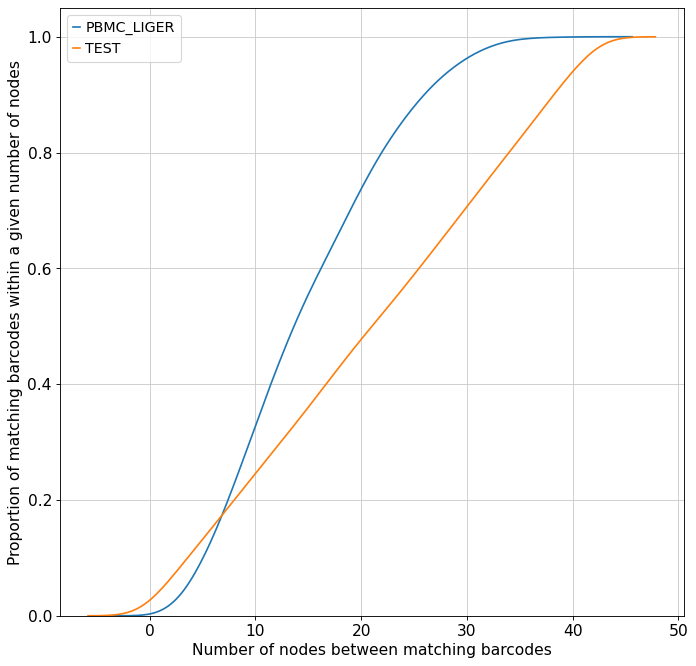

In [17]:
adata1 = ad.AnnData()
adata1.uns['node_metrics'] = {}
adata1.uns['node_metrics']['nodes_count'] = list(np.random.randint(0, 43, 10992))
scmoib.pl.cumulative_node_group([pbmc, adata1], legend=('PBMC_LIGER', 'TEST'))

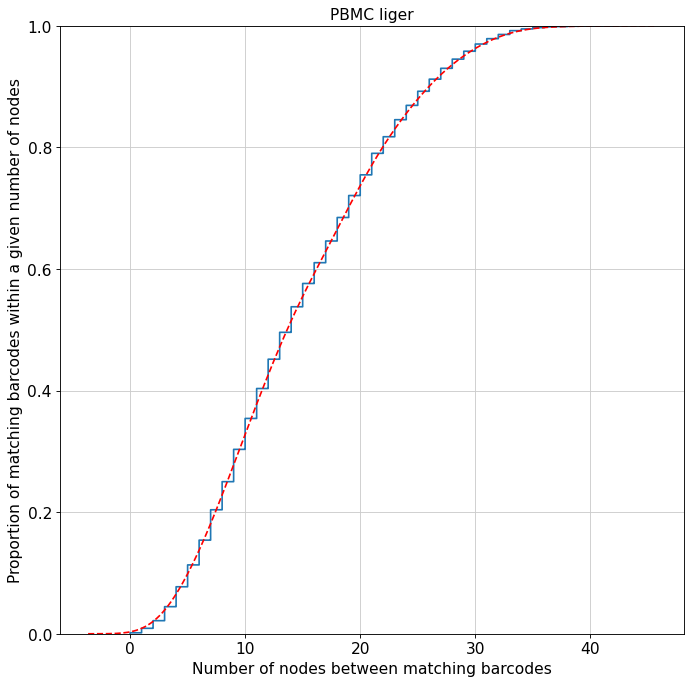

In [18]:
scmoib.pl.cumulative_node(pbmc, 'PBMC liger')

In [19]:
pbmc

AnnData object with n_obs × n_vars = 21984 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log_n_genes', 'filter_barcodes', 'broad.cell.types', 'louvain2_rna', 'nb_features', 'log_nb_features', 'louvain_lsi', 'n_counts', 'louvain_pca', 'louvain', 'filter', 'batch', 'omic_batch', 'group', 'clusters', 'RNA_snn_res.0.3', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors', 'node_metrics'
    obsm: 'X_iNMF', 'X_iNMF_raw', 'X_pca', 'X_umap'
    varm: 'INMF_RAW', 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:
'connectivities' in pbmc.obsp

True

In [21]:
my_obj.metrics['test'] = {}
my_obj.metrics['test']['disc_ratio'] = 0.25
print(my_obj.metrics)

{'pbmc_liger': {'AMI': 0.5048331010496683, 'ARI': 0.35482446371486587, 'NMI': 0.5057174898195305, 'homogeneity': 0.6103135222570035, 'sil_global': 0.5120715322309394, 'sil_clus': 0.4665468545502218, 'il_score_clus': nan, 'il_score_sil': nan, 'num_inf': 0, 'mean_nodes': 14.711608442503639, 'disc_ratio': 0.0}, 'test': {'disc_ratio': 0.25}}


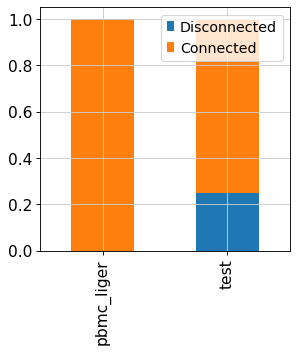

In [22]:
df = my_obj.get_df()
scmoib.pl.cd_ratio(df)

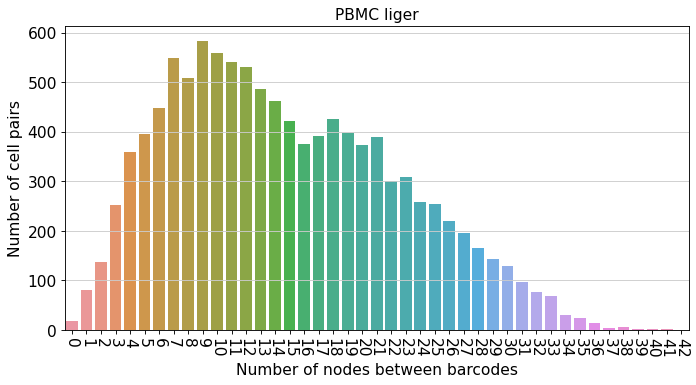

In [23]:
scmoib.pl.node_distr(pbmc, title='PBMC liger')

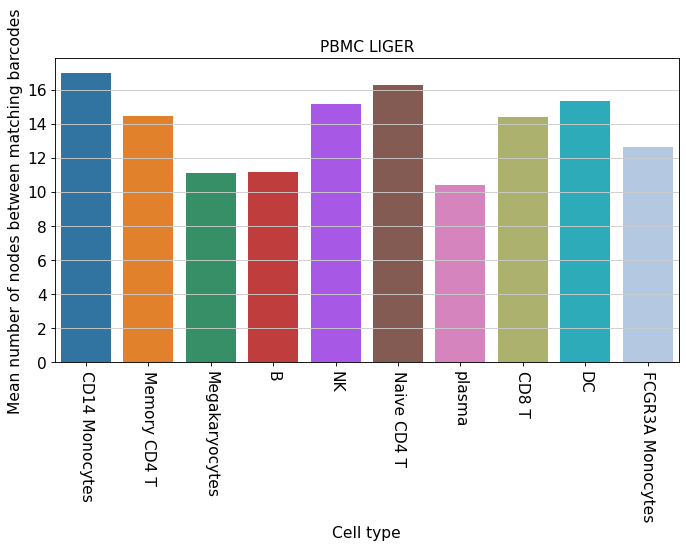

In [24]:
scmoib.pl.mean_node_per_cell_type(pbmc, "PBMC LIGER")

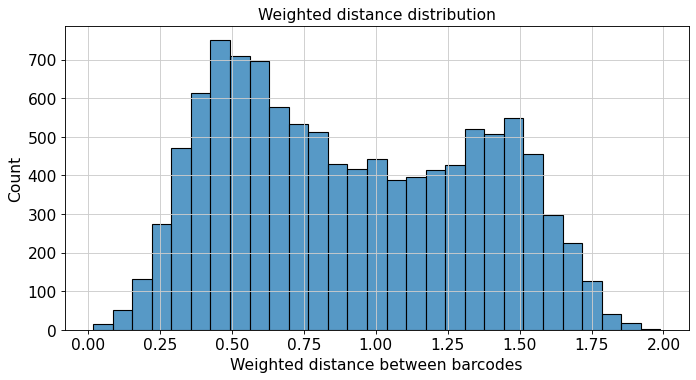

In [25]:
scmoib.pl.dists_distr(pbmc)

In [26]:
pbmc.obs['seurat_clusters'] = pbmc.obs['seurat_clusters'].astype('category')
pbmc.obs['batch'] = pbmc.obs['batch'].astype('category')

In [ ]:
scmoib.tl.metrics.graph_connectivity(pbmc, 'batch')